<h2>Comparison of Heitronics and Heiman radiometric skin temperature instruments deployed duting START 2014</h2>

<b>Author</b><br>
Nick Guy

<b>Overview</b><br>
This notebook looks at the performance difference between two infrared radiative thermometers deployed on the UWyo King Air research aircraft during the START 2014 experiment. The Heiman KT-19.85 is the original instrument that is housed in a large casing that fits into the nadir port. Using this precludes the use of lidar or other instrument needing this port. The Heitronics KT-15.85 is basically the sensor within the large KT-19.85 packaging and is installed in the "hell hole" looking downward. 

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import os
import glob
import awot
from awot.graph import create_basemap, FlightLevel, RadarHorizontalPlot
%matplotlib inline

<b>The following days were chosen as they were generally clear air conditions.</b><br>
<i>30 and 31 March<br>
1, 3, 6, 8 April, 2014</i><br>

In [3]:
name_map = {
    # Aircraft Position
    'longitude': 'LONC',
    'latitude': 'LATC',
    'altitude': 'ztrue',
    'pressure_altitude': 'PALT',
    'tas': 'tas',
    'ias': 'aias',
    'true_heading': 'AVthead',
    'pitch': 'AVpitch',
    'roll_angle': 'AVroll',
    # Atmospheric State
    'pressure': 'pmb',
    'temperature': 'trf',
    'dewpoint_temperature': 'tdplicor',
    'thetad': 'thetad',
    'thetae': 'thetae',
    'relative_humidity': 'rh',
    'mixing_ratio': 'mr',
    'lwc': 'lwc100',
    'turb': 'turb',
    'g_accel': 'avnorma',
    # Radiometric
    'irtop': 'irtc',
    'irbottom': 'irbc',
    'swtop': 'swt',
    'swbottom': 'swb',
    'kt1585': 'KT_RAW',
    'kt1985': 'HEIMAN_RAW',
    'rstb1585': 'rstb2',
    'rstb1985': 'rstb',
    
    # Wind derivations
    'Uwind': 'avuwind',
    'Vwind': 'avvwind',
    'Wwind': 'avwwind',
    'longitudinal_wind': 'avux',
    'latitudinal_wind': 'avvy',
    'wind_dir': 'avwdir',
    'wind_spd': 'axwmag',
    # Licor Concentrations
    'co2_conc': 'co21s',
    'h2o_conc': 'h2o1s',
    # Aerosol
#    'pcasp_num': 'AS200_OBR',
#    'pcasp_conc': 'CS200_OBR',
#    'pcasp_mean_diam': 'DBARP_OBR',
#    'pcasp_surf_area_conc': 'PSFCP_OBR',
#    'pcasp_vol_conc': 'PVOLP_OBR',
    # Cloud Physics
    'conc_cpc': 'cpc_conc',
    # Miscellaneous
    'topo': 'topo'}

fdir = '/Users/guy/data/king_air/start14'

# Create a dictionary to hold the various flight data
flights1Hz = {}
flights1Hz['0330'] = awot.io.read_netcdf(os.path.join(fdir, '20140330.c1.nc'), mapping_dict=name_map)
flights1Hz['0331'] = awot.io.read_netcdf(os.path.join(fdir, '20140331.c1.nc'), mapping_dict=name_map)
flights1Hz['0401'] = awot.io.read_netcdf(os.path.join(fdir, '20140401.c1.nc'), mapping_dict=name_map)
flights1Hz['0403'] = awot.io.read_netcdf(os.path.join(fdir, '20140403.c1.nc'), mapping_dict=name_map)
flights1Hz['0406'] = awot.io.read_netcdf(os.path.join(fdir, '20140406.c1.nc'), mapping_dict=name_map)
flights1Hz['0408'] = awot.io.read_netcdf(os.path.join(fdir, '20140408.c1.nc'), mapping_dict=name_map)

Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable


<b>Let's see what variables are used in the file.</b>

In [4]:
#print(flight0330_1.keys())
for name in flights1Hz['0330'].keys():
    try:
        if 'radiometric' in flights1Hz['0330'][name]['long_name'].lower():
            print(name, flights1Hz['0330'][name]['long_name'])
    except:
        pass

rstb1985 IR radiometric temperature (Heiman)
rstb1585 IR radiometric temperature (Heitronics)


In [6]:
flights1Hz['0330']['rstb1585']#['HEIMAN_RAW']#['KT_RAW']

{u'Dependencies': u' ',
 u'OutputRate': 1,
 u'Package': u'get_radiom1',
 u'Status': u'Raw Variable',
 u'_FillValue': -32767.0,
 'data': masked_array(data = [17.762996673583984 17.89165496826172 18.247875213623047 ...,
  35.73080062866211 35.301551818847656 35.07954406738281],
              mask = [False False False ..., False False False],
        fill_value = 1e+20),
 u'long_name': u'IR radiometric temperature (Heitronics)',
 u'matlab_name': u'KT1',
 u'raw_name': u'unknown',
 u'units': u'Celsius'}

<b>Calculate the difference between KT-15.85 and KT-19.85 and insert into the AWOT dictionary.</b>

In [7]:
for day in flights1Hz.keys():
    diff = flights1Hz[day]['rstb1585']['data'] - flights1Hz[day]['rstb1985']['data']
    frac = diff / flights1Hz[day]['rstb1585']['data']
    awot.util.add_dict_to_awot(flights1Hz[day], 'ktdiff15-19', data=diff, units=flights1Hz[day]['rstb1585']['units'],
                              longname="Difference between KT-15.85 and KT-19.85",
                              stdname="ktdiff")
    awot.util.add_dict_to_awot(flights1Hz[day], 'ktfrac15', data=frac, units='unitless',
                              longname="Fraction of difference between KT-15.85 and KT-19.85 with respect to KT-15.85",
                              stdname="ktfrac")
    print("Flight : %s\n"
         "KT-15.85/KT-19.85 Min: %g/%g\n"
         "KT-15.85/KT-19.85 Max: %g/%g\n"
         "KT-15.85-KT-19.85 Max/Min: %g/%g\n" % ( day,
            flights1Hz[day]['rstb1585']['data'].min(), flights1Hz[day]['rstb1985']['data'].min(),
            flights1Hz[day]['rstb1585']['data'].max(), flights1Hz[day]['rstb1985']['data'].max(),
            diff.min(), diff.max())
         )

Flight : 0401
KT-15.85/KT-19.85 Min: 5.91962/6.26408
KT-15.85/KT-19.85 Max: 40.1656/38.1888
KT-15.85-KT-19.85 Max/Min: -13.7448/13.3619

Flight : 0403
KT-15.85/KT-19.85 Min: -11.3084/-7.98814
KT-15.85/KT-19.85 Max: 44.3605/43.531
KT-15.85-KT-19.85 Max/Min: -13.8673/14.251

Flight : 0406
KT-15.85/KT-19.85 Min: 6.79573/7.80592
KT-15.85/KT-19.85 Max: 41.8703/42.2371
KT-15.85-KT-19.85 Max/Min: -13.0425/14.6749

Flight : 0408
KT-15.85/KT-19.85 Min: 15.2973/13.5995
KT-15.85/KT-19.85 Max: 52.9446/54.3283
KT-15.85-KT-19.85 Max/Min: -16.7355/19.5248

Flight : 0330
KT-15.85/KT-19.85 Min: -18.2119/-16.8606
KT-15.85/KT-19.85 Max: 39.3238/41.5459
KT-15.85-KT-19.85 Max/Min: -21.475/11.5038

Flight : 0331
KT-15.85/KT-19.85 Min: 13.987/14.5893
KT-15.85/KT-19.85 Max: 38.5663/38.2709
KT-15.85-KT-19.85 Max/Min: -12.3273/12.8821



<b>As a geographical reference, let's create a map of flight tracks for these missions.</b>

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


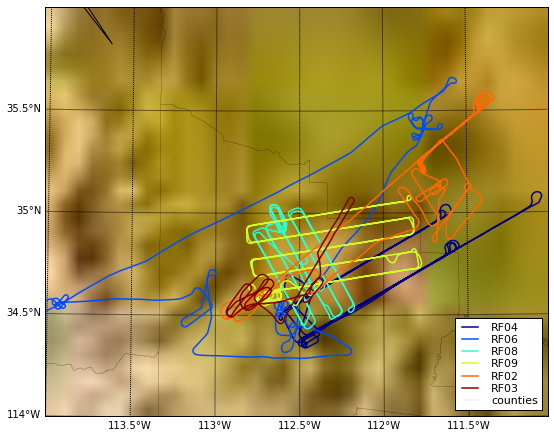

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
corners = [-114., 34., -111., 36.,]
lat0 = (corners[1] + corners[3])/2.
lon0 = (corners[0] + corners[2])/2.
bm = create_basemap(corners=corners, proj='lcc', resolution='l', area_thresh=1., lat_0=lat0, lon_0=lon0,
                    lon_spacing=0.5, lat_spacing=0.5, ax=ax)
bm.drawcounties()
bm.etopo()

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))

# Create the basemap
for day, c in zip(flights1Hz.keys(), colors):
    flp = FlightLevel(flights1Hz[day], basemap=bm)
    flp.plot_trackmap(track_color=c, addlegend=True, addtitle=False, ax=ax)

<b>Time Series plots for each day.</b>

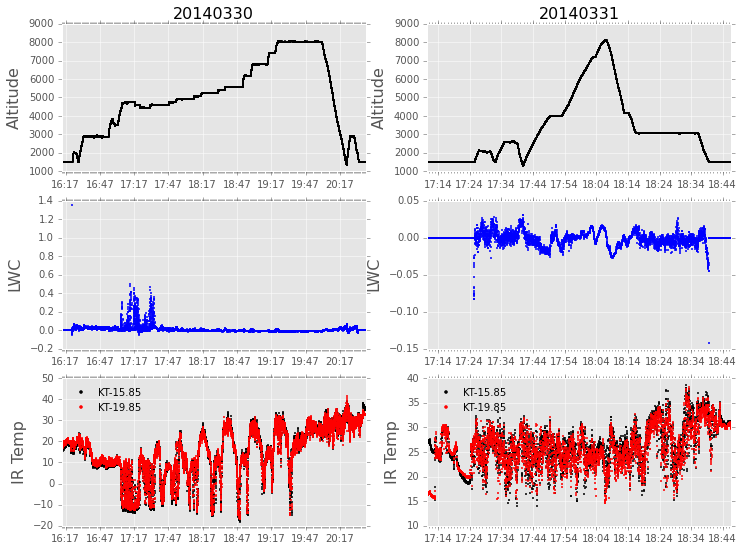

In [9]:
flp0330 = FlightLevel(flights1Hz['0330'])
flp0331 = FlightLevel(flights1Hz['0331'])

plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 9))
flp0330.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2,
                        date_format='%H:%M', tz=None, xdate=True,
#                    date_minor_string='minute', other_major_ticks=None, other_minor_ticks=None,
#                    other_min=None, other_max=None, 
#                    start_time=start_time, end_time=end_time,
                        title='20140330', ylab='Altitude', ax=ax1)

flp0330.plot_timeseries('lwc', color='b', ax=ax3, ylab=r"LWC")
flp0330.plot_timeseries('rstb1585', color='k', ax=ax5, ylab="IR Temp")
flp0330.overplot_timeseries('rstb1985', color='r', ax=ax5)
ax5.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")

flp0331.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2,
                        date_format='%H:%M', tz=None, xdate=True,
                        title='20140331', ylab='Altitude', ax=ax2)

flp0331.plot_timeseries('lwc', color='b', ax=ax4, ylab=r"LWC")
flp0331.plot_timeseries('rstb1585', color='k', ax=ax6, ylab="IR Temp")
flp0331.overplot_timeseries('rstb1985', color='r', ax=ax6)
ax6.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")

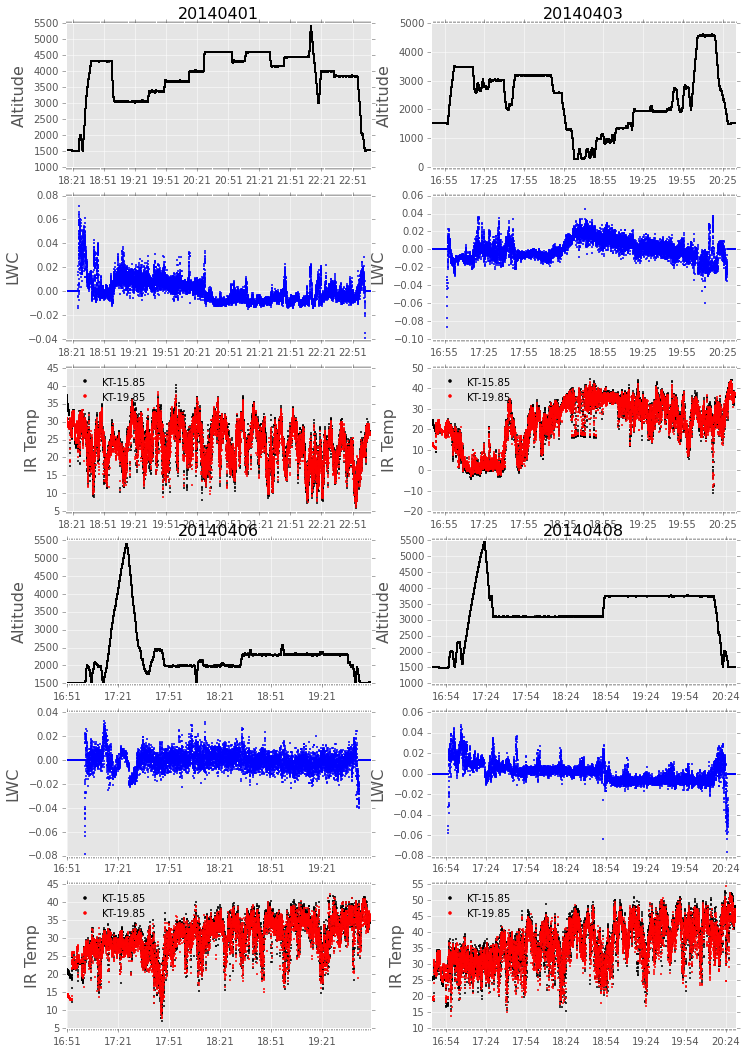

In [10]:
flp0401 = FlightLevel(flights1Hz['0401'])
flp0403 = FlightLevel(flights1Hz['0403'])
flp0406 = FlightLevel(flights1Hz['0406'])
flp0408 = FlightLevel(flights1Hz['0408'])

plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11,ax12)) = plt.subplots(6, 2, figsize=(12, 18))
flp0401.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2, date_format='%H:%M', xdate=True,
                        title='20140401', ylab='Altitude', ax=ax1)

flp0401.plot_timeseries('lwc', color='b', ax=ax3, ylab=r"LWC")
flp0401.plot_timeseries('rstb1585', color='k', ax=ax5, ylab="IR Temp")
flp0401.overplot_timeseries('rstb1985', color='r', ax=ax5)
ax5.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")

flp0403.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2, date_format='%H:%M', xdate=True,
                        title='20140403', ylab='Altitude', ax=ax2)

flp0403.plot_timeseries('lwc', color='b', ax=ax4, ylab=r"LWC")
flp0403.plot_timeseries('rstb1585', color='k', ax=ax6, ylab="IR Temp")
flp0403.overplot_timeseries('rstb1985', color='r', ax=ax6)
ax6.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")

flp0406.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2, date_format='%H:%M', xdate=True,
                        title='20140406', ylab='Altitude', ax=ax7)

flp0406.plot_timeseries('lwc', color='b', ax=ax9, ylab=r"LWC")
flp0406.plot_timeseries('rstb1585', color='k', ax=ax11, ylab="IR Temp")
flp0406.overplot_timeseries('rstb1985', color='r', ax=ax11)
ax11.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")

flp0408.plot_timeseries('altitude', color='k', marker='o', msize=1.5, lw=2, date_format='%H:%M', xdate=True,
                        title='20140408', ylab='Altitude', ax=ax8)

flp0408.plot_timeseries('lwc', color='b', ax=ax10, ylab=r"LWC")
flp0408.plot_timeseries('rstb1585', color='k', ax=ax12, ylab="IR Temp")
flp0408.overplot_timeseries('rstb1985', color='r', ax=ax12)
ax12.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")
#flp0408.plot_timeseries('ktdiff15-19', color='k', ax=ax12)

<b>Scatter plot of the two IR radiometric temperature variables for the 30 Mar 2014 with unity line.</b>

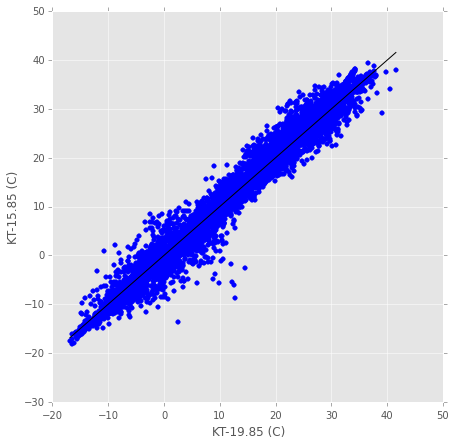

In [11]:
# Create unity line
uni = np.linspace(flights1Hz['0330']['rstb1985']['data'].min(), flights1Hz['0330']['rstb1985']['data'].max(), 50)

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(flights1Hz['0330']['rstb1985']['data'], flights1Hz['0330']['rstb1585']['data'], edgecolors='face')
ax.set_xlabel("KT-19.85 (C)")
ax.set_ylabel("KT-15.85 (C)")
ax.plot(uni, uni, 'k-')

<b>Plot all scatter data to see general distribution. The groupings are generally pretty close.</b>

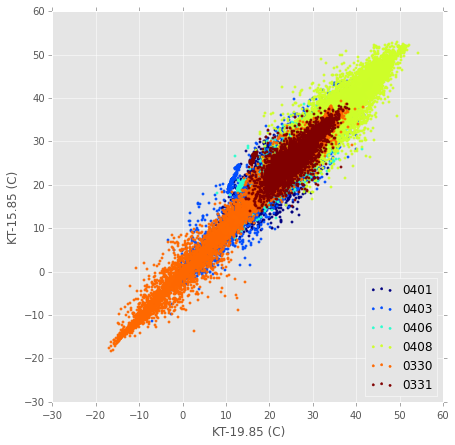

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(7,7))

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))
for day, c in zip(flights1Hz.keys(), colors):
    ax.scatter(flights1Hz[day]['rstb1985']['data'], flights1Hz[day]['rstb1585']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
ax.set_xlabel("KT-19.85 (C)")
ax.set_ylabel("KT-15.85 (C)")
ax.legend(loc='lower right')

<b>Scatter plot of difference as a function of atmospheric state fields.</b>

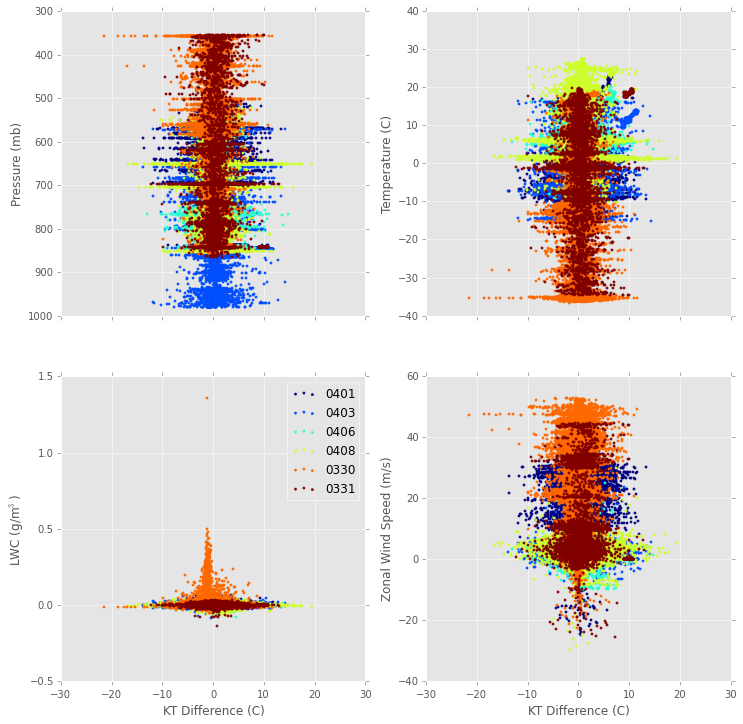

In [13]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex=True)

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))
for day, c in zip(flights1Hz.keys(), colors):
    ax1.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['pressure']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax2.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['temperature']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax3.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['lwc']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax4.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['Uwind']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
ax3.set_xlabel("KT Difference (C)")
ax1.set_ylabel("Pressure (mb)")
ax1.set_ylim(bottom=1000., top=300.)
ax2.set_ylabel("Temperature (C)")
ax3.set_ylabel(r"LWC (g/m$^3$)")
ax4.set_xlabel("KT Difference (C)")
ax4.set_ylabel("Zonal Wind Speed (m/s)")
ax3.legend(loc='upper right')

<b>Scatter plot of difference as a function of aircraft state fields.</b>

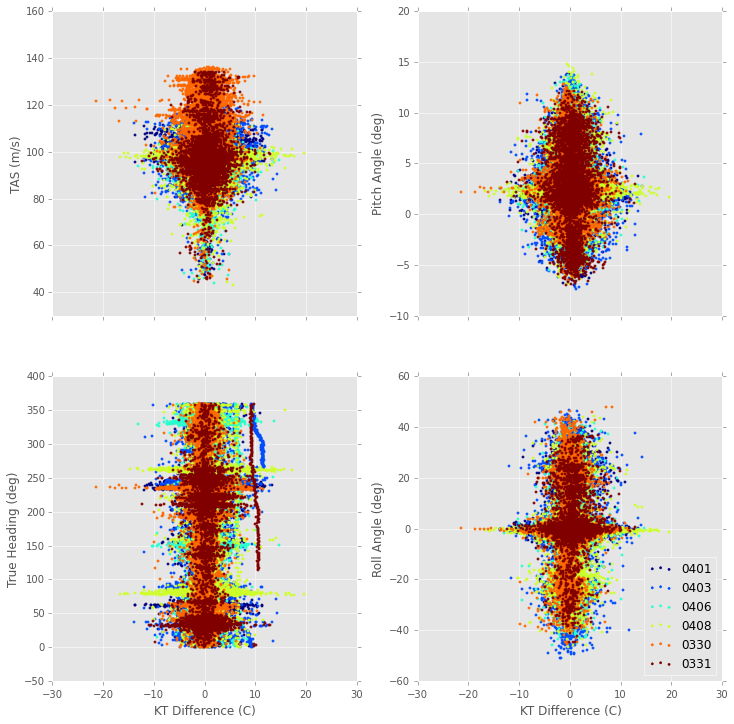

In [14]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex=True)

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))
for day, c in zip(flights1Hz.keys(), colors):
    ax1.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['tas']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax2.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['pitch']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax3.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['true_heading']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax4.scatter(flights1Hz[day]['ktdiff15-19']['data'], flights1Hz[day]['roll_angle']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
ax3.set_xlabel("KT Difference (C)")
ax1.set_ylabel("TAS (m/s)")
ax1.set_ylim(bottom=30)
ax2.set_ylabel("Pitch Angle (deg)")
ax3.set_ylabel("True Heading (deg)")
#ax3.set_ylim(bottom=30)
ax4.set_xlabel("KT Difference (C)")
ax4.set_ylabel("Roll Angle (deg)")
ax4.legend(loc='lower right')

<B>As above, but scatter using fractional differenc WRT KT-15.85 measurement.</b>

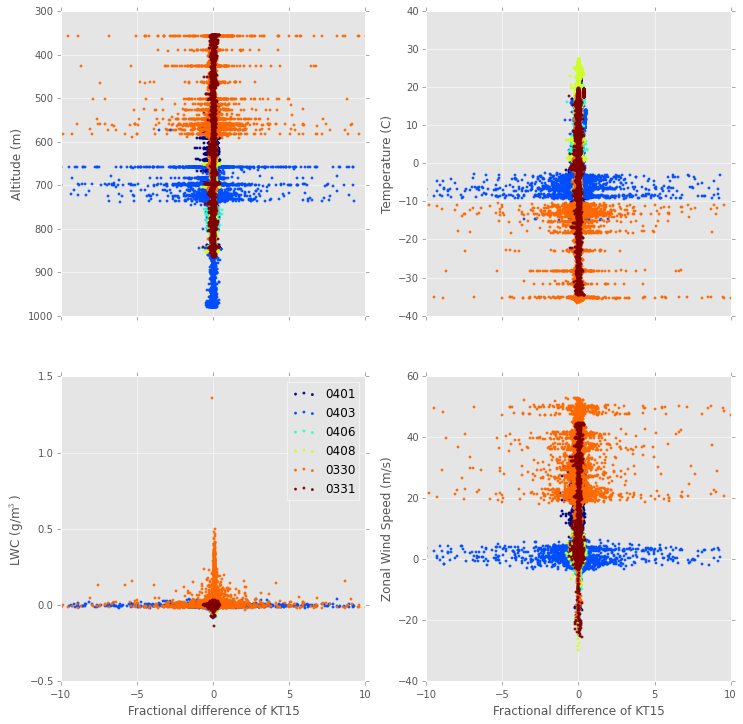

In [15]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex=True)

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))
for day, c in zip(flights1Hz.keys(), colors):
    ax1.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['pressure']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax2.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['temperature']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax3.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['lwc']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax4.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['Uwind']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
ax3.set_xlabel("Fractional difference of KT15")
ax4.set_xlabel("Fractional difference of KT15")
ax1.set_ylabel("Altitude (m)")
ax1.set_ylim(bottom=1000., top=300.)
ax1.set_xlim(left=-10, right=10)
ax2.set_ylabel("Temperature (C)")
ax3.set_ylabel(r"LWC (g/m$^3$)")
ax4.set_ylabel("Zonal Wind Speed (m/s)")
ax3.legend(loc='upper right')

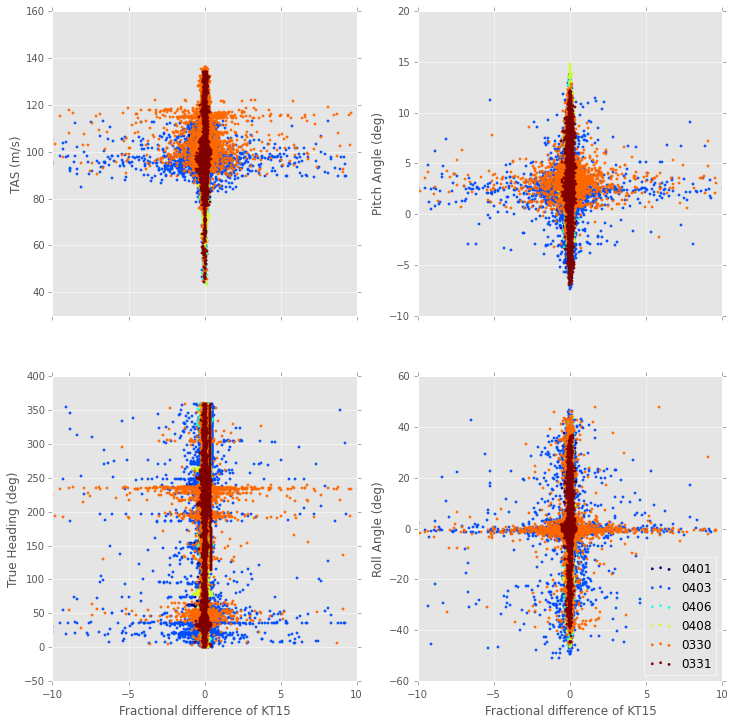

In [16]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex=True)

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))
for day, c in zip(flights1Hz.keys(), colors):
    ax1.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['tas']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax2.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['pitch']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax3.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['true_heading']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
    ax4.scatter(flights1Hz[day]['ktfrac15']['data'], flights1Hz[day]['roll_angle']['data'], color=c, 
               marker='.', edgecolors='face', label=day)
ax3.set_xlabel("Fractional difference of KT15")
ax1.set_ylabel("TAS (m/s)")
ax1.set_xlim(left=-10, right=10)
ax1.set_ylim(bottom=30)
ax2.set_ylabel("Pitch Angle (deg)")
ax3.set_ylabel("True Heading (deg)")
ax4.set_xlabel("Fractional difference of KT15")
ax4.set_ylabel("Roll Angle (deg)")
ax4.legend(loc='lower right')

<b>Concatenate all KT15 and difference data for bivariate analysis.</b>

In [17]:
difference = np.empty([1])
frac = np.empty([1])
kt15 = np.empty([1])
lwc = np.empty([1])
turb = np.empty([1])
for day in flights1Hz.keys():
    difference = np.hstack((difference, flights1Hz[day]['ktdiff15-19']['data']))
    frac = np.hstack((frac, flights1Hz[day]['ktfrac15']['data']))
    kt15 = np.hstack((kt15, flights1Hz[day]['rstb1585']['data']))
    turb = np.hstack((turb, flights1Hz[day]['turb']['data']))

# Remove the first entry of empty number
difference = difference[1::]
frac = frac[1::]
kt15 = kt15[1::]
turb = turb[1::]

<b>Plot bivariate distributions to see if any have obvious contributions to the spread.</b>

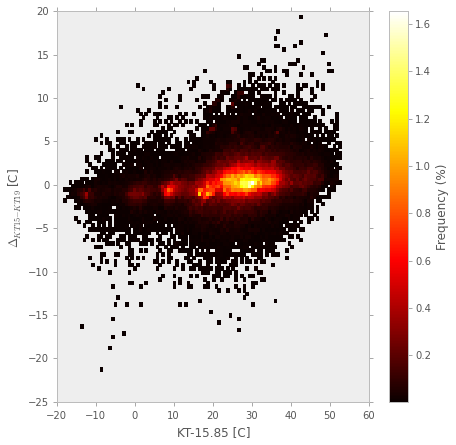

In [18]:
binsx = np.linspace(np.ma.min(kt15), np.ma.max(kt15), 100, endpoint=True)
binsy = np.linspace(np.ma.min(difference), np.ma.max(difference), 100, endpoint=True)
        
bifreq, xedges, yedges = np.histogram2d(
                 kt15.ravel(), difference.ravel(), bins=(binsx, binsy), normed=True)
X, Y = np.meshgrid(xedges, yedges)

bifreq = np.ma.masked_equal(bifreq, 0.)
plt.style.use('bmh')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
biv = ax.pcolormesh(X, Y, bifreq.T*100., cmap='hot')
ax.set_xlabel("KT-15.85 [C]")
ax.set_ylabel(r"${\Delta}$$_{KT15 - KT19}$ [C]")
cb = plt.colorbar(biv)
cb.set_label('Frequency (%)')

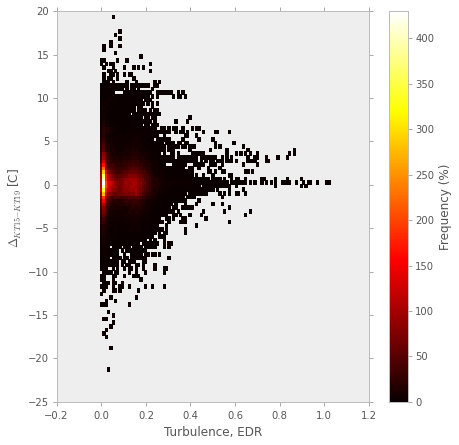

In [19]:
binsx = np.linspace(np.ma.min(turb), np.ma.max(turb), 100, endpoint=True)
binsy = np.linspace(np.ma.min(difference), np.ma.max(difference), 100, endpoint=True)
        
bifreq, xedges, yedges = np.histogram2d(
                 turb.ravel(), difference.ravel(), bins=(binsx, binsy), normed=True)
X, Y = np.meshgrid(xedges, yedges)

bifreq = np.ma.masked_equal(bifreq, 0.)
plt.style.use('bmh')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
biv = ax.pcolormesh(X, Y, bifreq.T*100., cmap='hot')
ax.set_xlabel("Turbulence, EDR ")
ax.set_ylabel(r"${\Delta}$$_{KT15 - KT19}$ [C]")
cb = plt.colorbar(biv)
cb.set_label('Frequency (%)')

<b>The analysis in notebook suggests that in general the measurements between the KT-15.85 and KT-19.85 are consistent and deviate only a few percent. However, there are outliers and the 30 Mar and 3 Apr cases show much greater spread in concurrent observations. Potentially contributing to this are differing land surface types. Both flights transitted further northeast than the others, so let's fund out the subset of time in that region and cut it from the analysis.</b>

<b>We can look at the flight tracks of the two outlier days and find our times in that general region to the northeast.</b>

2014-03-30 16:13:24 2014-03-30 20:39:44
2014-04-03 16:45:03 2014-04-03 20:35:00


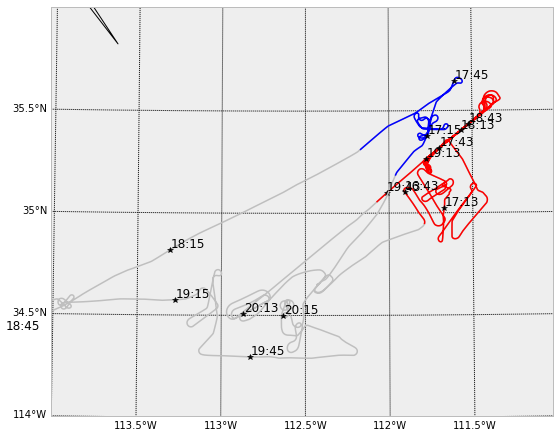

In [20]:
print(flights1Hz['0330']['time']['data'].min(), flights1Hz['0330']['time']['data'].max())
print(flights1Hz['0403']['time']['data'].min(), flights1Hz['0403']['time']['data'].max())

fig, axsub = plt.subplots(1, 1, figsize=(9, 9))

bm = create_basemap(corners=corners, proj='lcc', resolution='l', area_thresh=1., lat_0=lat0, lon_0=lon0,
                    lon_spacing=0.5, lat_spacing=0.5, ax=axsub)

flp0330 = FlightLevel(flights1Hz['0330'], basemap=bm)
flp0403 = FlightLevel(flights1Hz['0403'], basemap=bm)
flp0330.plot_trackmap(track_color='.75', ax=axsub)
flp0330.plot_trackmap(track_color='r', start_time="2014-03-30T16:40:00", end_time="2014-03-30T19:45:00", ax=axsub)
flp0330.time_stamps()
flp0403.plot_trackmap(track_color='.75', ax=axsub)
flp0403.plot_trackmap(track_color='b', start_time="2014-04-03T17:10:00", end_time="2014-04-03T17:56:00", ax=axsub)
flp0403.time_stamps()

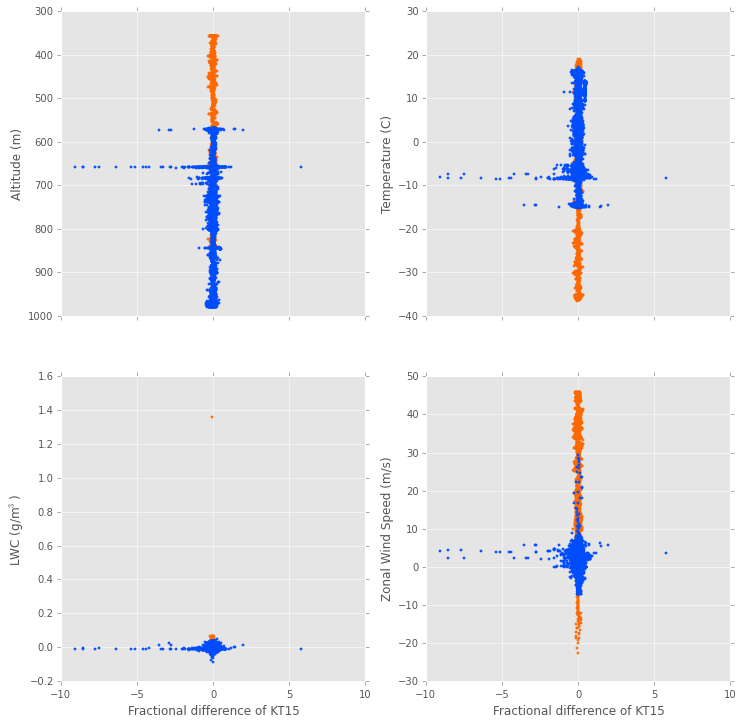

In [22]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex=True)

colors = mcm.get_cmap()(np.linspace(0, 1, len(flights1Hz.keys())))

s0330a, e0330a = "2014-03-30T16:13:24", "2014-03-30T16:40:00"
s0330b, e0330b = "2014-03-30T19:45:00", "2014-03-30T20:39:44"
s0403a, e0403a = "2014-04-03T16:45:03", "2014-04-03T17:10:00"
s0403b, e0403b = "2014-04-03T17:56:00", "2014-04-03 20:35:00"
# Get the subsetted times from above, excluding the the region
kfrac0330a = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['ktfrac15'],
                                         start_time=s0330a, end_time=e0330a)
p0330a = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['pressure'],
                                         start_time=s0330a, end_time=e0330a)
t0330a = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['temperature'],
                                         start_time=s0330a, end_time=e0330a)
lwc0330a = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['lwc'],
                                         start_time=s0330a, end_time=e0330a)
u0330a = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['Uwind'],
                                         start_time=s0330a, end_time=e0330a)

kfrac0330b = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['ktfrac15'],
                                         start_time=s0330b, end_time=e0330b)
p0330b = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['pressure'],
                                         start_time=s0330b, end_time=e0330b)
t0330b = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['temperature'],
                                         start_time=s0330b, end_time=e0330b)
lwc0330b = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['lwc'],
                                         start_time=s0330b, end_time=e0330b)
u0330b = awot.util.time_subset_awot_dict(flights1Hz['0330']['time'], flights1Hz['0330']['Uwind'],
                                         start_time=s0330b, end_time=e0330b)

kfrac0403a = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['ktfrac15'],
                                         start_time=s0403a, end_time=e0403a)
p0403a = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['pressure'],
                                         start_time=s0403a, end_time=e0403a)
t0403a = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['temperature'],
                                         start_time=s0403a, end_time=e0403a)
lwc0403a = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['lwc'],
                                         start_time=s0403a, end_time=e0403a)
u0403a = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['Uwind'],
                                         start_time=s0403a, end_time=e0403a)

kfrac0403b = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['ktfrac15'],
                                         start_time=s0403b, end_time=e0403b)
p0403b = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['pressure'],
                                         start_time=s0403b, end_time=e0403b)
t0403b = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['temperature'],
                                         start_time=s0403b, end_time=e0403b)
lwc0403b = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['lwc'],
                                         start_time=s0403b, end_time=e0403b)
u0403b = awot.util.time_subset_awot_dict(flights1Hz['0403']['time'], flights1Hz['0403']['Uwind'],
                                         start_time=s0403b, end_time=e0403b)

ax1.scatter(kfrac0330a['data'], p0330a['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax2.scatter(kfrac0330a['data'], t0330a['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax3.scatter(kfrac0330a['data'], lwc0330a['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax4.scatter(kfrac0330a['data'], u0330a['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax1.scatter(kfrac0330b['data'], p0330b['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax2.scatter(kfrac0330b['data'], t0330b['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax3.scatter(kfrac0330b['data'], lwc0330b['data'], color=colors[4], 
            marker='.', edgecolors='face')
ax4.scatter(kfrac0330b['data'], u0330b['data'], color=colors[4], 
            marker='.', edgecolors='face')

ax1.scatter(kfrac0403a['data'], p0403a['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax2.scatter(kfrac0403a['data'], t0403a['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax3.scatter(kfrac0403a['data'], lwc0403a['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax4.scatter(kfrac0403a['data'], u0403a['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax1.scatter(kfrac0403b['data'], p0403b['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax2.scatter(kfrac0403b['data'], t0403b['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax3.scatter(kfrac0403b['data'], lwc0403b['data'], color=colors[1], 
            marker='.', edgecolors='face')
ax4.scatter(kfrac0403b['data'], u0403b['data'], color=colors[1], 
            marker='.', edgecolors='face')

ax3.set_xlabel("Fractional difference of KT15")
ax4.set_xlabel("Fractional difference of KT15")
ax1.set_ylabel("Altitude (m)")
ax1.set_ylim(bottom=1000., top=300.)
ax1.set_xlim(left=-10, right=10)
ax2.set_ylabel("Temperature (C)")
ax3.set_ylabel(r"LWC (g/m$^3$)")
ax4.set_ylabel("Zonal Wind Speed (m/s)")

<b>The plot above compared to an earlier version with all data suggests that this region does have a measureable effect on the differing observations between the KT-15.85 and KT-19.85</b>